In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exercícios




## 1) Drift em Dados
Assumindo que temos um modelo treinado e a executar num servidor na Google Cloud Platform já há algum tempo, é necessário perceber se existe algum “drift” dos dados recolhidos atualmente sobre os dados usados para treino. O principal problema é que não existem dados recentes classificados (não existe “ground truth”) para comparação, por isso apenas nos podemos guiar pelos dados recentes de entrada do modelo. Visto querermos saber se uma variável específica sofreu algum “drift”, é aconselhada a utilização de técnicas mono-variável. Baseados nos dados fornecidos (`historical.csv` + `new_data.csv`), por favor indique se existe algum “drift”, e se sim, indique quais as variáveis que sofreram esse “drift” e explique o porquê de as ter considerado?

In [18]:
# Carrega os dados
historical_data = pd.read_csv("/content/drive/MyDrive/MLOps data/historical.csv")
new_data = pd.read_csv("/content/drive/MyDrive/MLOps data/new_data.csv")
training_data = pd.read_csv("/content/drive/MyDrive/MLOps data/training_data.csv")

In [5]:
historical_data.head()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
0,0.571614,0,0,0.342118,0.616871,0.418857,0.758517,0,0,0,1,1,0,0,-36.377874,21.351665,3.991709
1,0.402271,0,0,0.373213,0.574701,0.546779,0.749582,0,1,1,1,0,0,0,88.449750,-37.426948,-46.275876
2,0.485398,0,0,0.411632,0.657100,0.529637,0.793919,1,1,1,1,0,1,0,-21.730988,24.394874,82.679909
3,0.465359,0,0,0.432781,0.573072,0.352555,0.823565,1,1,1,1,0,0,0,0.127095,4.760497,-96.334204
4,0.442205,0,0,0.392622,0.649628,0.425873,0.866499,0,1,1,1,0,1,0,103.078832,12.348019,61.515670


In [8]:
#verificando valores em falta
soma_missings_por_coluna = historical_data.isnull().sum()
soma_missings_por_coluna

Length of Username            0
Country Block_1               0
Country Block_2               0
Number of Followers           0
Number of Posts               0
Number of Mutual Followers    0
Percentage of Following       0
Is Business Account           0
Class                         0
Sex                           0
Is Joined Recently            0
Is Verified                   0
Is Private                    0
Is Professional Account       0
Length of Biography           0
Number of Video Posts         0
Mean Post Likes               0
dtype: int64

In [15]:
#verificando valores em falta
soma_missings_por_coluna = new_data.isnull().sum()
soma_missings_por_coluna

Length of Username            0
Country Block_1               0
Country Block_2               0
Number of Followers           0
Number of Posts               0
Number of Mutual Followers    0
Percentage of Following       0
Is Business Account           0
Sex                           0
Is Joined Recently            0
Is Verified                   0
Is Private                    0
Is Professional Account       0
Length of Biography           0
Number of Video Posts         0
Mean Post Likes               0
dtype: int64

In [9]:
historical_data.describe()

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes
count,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.513242,0.0,0.003500,0.352259,0.617551,0.452278,0.796557,0.40400,0.506500,0.306000,0.579000,0.195500,0.593500,0.467500,48.521723,32.299053,30.568269
std,0.100227,0.0,0.059072,0.076940,0.073240,0.073929,0.034571,0.49082,0.500083,0.460945,0.493843,0.396684,0.491303,0.499067,68.772776,58.570005,75.530590
min,0.338443,0.0,0.000000,0.027737,0.518869,0.000000,0.672109,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-185.036722,-153.152065,-259.695452
25%,0.432568,0.0,0.000000,0.305230,0.559407,0.405721,0.773777,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.758366,-3.510600,-14.195461
50%,0.494676,0.0,0.000000,0.367440,0.603130,0.468721,0.796340,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,54.983273,20.639543,30.625284
75%,0.573195,0.0,0.000000,0.414403,0.662802,0.512388,0.818207,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,92.196825,61.338687,77.593575
max,0.953919,0.0,1.000000,0.464836,0.945480,0.549291,0.906873,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,407.621937,299.215480,314.217586


In [10]:
historical_data.dtypes

Length of Username            float64
Country Block_1                 int64
Country Block_2                 int64
Number of Followers           float64
Number of Posts               float64
Number of Mutual Followers    float64
Percentage of Following       float64
Is Business Account             int64
Class                           int64
Sex                             int64
Is Joined Recently              int64
Is Verified                     int64
Is Private                      int64
Is Professional Account         int64
Length of Biography           float64
Number of Video Posts         float64
Mean Post Likes               float64
dtype: object

In [14]:
new_data.dtypes

Length of Username            float64
Country Block_1                 int64
Country Block_2                 int64
Number of Followers           float64
Number of Posts               float64
Number of Mutual Followers    float64
Percentage of Following       float64
Is Business Account             int64
Sex                             int64
Is Joined Recently              int64
Is Verified                     int64
Is Private                      int64
Is Professional Account         int64
Length of Biography           float64
Number of Video Posts         float64
Mean Post Likes               float64
dtype: object

In [11]:
#  Análise monovariável
import pandas as pd

# Calcula as médias das variáveis
historical_means = historical_data.mean()
new_means = new_data.mean()

# Compara as médias
for feature in historical_data.columns:
    if feature in historical_means and feature in new_means:
        print(f"Feature: {feature}\n\tMédia Histórica: {historical_means[feature]:.4f}\n\tMédia Recente: {new_means[feature]:.4f}\n")
    else:
        print(f"AVISO: A coluna '{feature}' não foi encontrada em um ou ambos os conjuntos de dados.\n")


Feature: Length of Username
	Média Histórica: 0.5132
	Média Recente: 0.4734

Feature: Country Block_1
	Média Histórica: 0.0000
	Média Recente: 0.0560

Feature: Country Block_2
	Média Histórica: 0.0035
	Média Recente: 0.0415

Feature: Number of Followers
	Média Histórica: 0.3523
	Média Recente: 0.5564

Feature: Number of Posts
	Média Histórica: 0.6176
	Média Recente: 0.4233

Feature: Number of Mutual Followers
	Média Histórica: 0.4523
	Média Recente: 0.6414

Feature: Percentage of Following
	Média Histórica: 0.7966
	Média Recente: 0.5206

Feature: Is Business Account
	Média Histórica: 0.4040
	Média Recente: 0.5055

AVISO: A coluna 'Class' não foi encontrada em um ou ambos os conjuntos de dados.

Feature: Sex
	Média Histórica: 0.3060
	Média Recente: 0.4960

Feature: Is Joined Recently
	Média Histórica: 0.5790
	Média Recente: 0.5115

Feature: Is Verified
	Média Histórica: 0.1955
	Média Recente: 0.7045

Feature: Is Private
	Média Histórica: 0.5935
	Média Recente: 0.2460

Feature: Is Profes

## Análise de Drift nos Dados

Ao avaliar os dados fornecidos, estabeleci um limiar de **20%** para determinar se ocorreu um "drift" significativo entre as características dos dados históricos e os dados recentes.

As características que excederam este limiar e, portanto, indicam um "drift" notável são:

- **Number of Followers**: Com um aumento de 57.9%.
- **Percentage of Following**: Apresentando uma redução de 34.7%.
- **Sex**: Com um aumento de 62.1%.
- **Is Verified**: Revelando um aumento surpreendente de 260.3%.
- **Is Private**: Demonstrando uma redução significativa de 58.5%.
- **Is Professional Account**: Com um aumento de 73.6%.
- **Mean Post Likes**: Com um aumento de 71.5%.

Dado o desvio destas características em mais de 20% em relação às suas médias originais, é indicado que houve uma mudança considerável na distribuição destes dados. Este "drift" pode afetar a performance de um modelo treinado, especialmente se foi inicialmente treinado com os dados históricos.

Em conclusão, com base nesta análise mono-variável e utilizando o limiar de 20% como critério, identifiquei um "drift" evidente nos dados atuais. Recomendo reavaliar e, se necessário, considerar o retreino do modelo com os dados mais recentes para garantir sua eficácia contínua.



## 2) Impacto do Drift
Imaginando que algumas das variáveis sofreram um “drift”, queremos saber se o impacto desse “drift” é realmente significativo para justificar o retreino do modelo existente. Visto que os “drifts” de algumas variáveis são menores do que outros, considere agora uma análise multi-variável. Para isso, por favor indique que abordagem utilizou e explique se o “drift” é significativo o suficiente que justifique o retreino do modelo.

In [16]:
import pandas as pd
import scipy.stats as stats

# Identifique as colunas comuns em ambos os DataFrames
common_columns = set(historical_data.columns) & set(new_data.columns)

# Realiza o t-test para colunas comuns
for feature in common_columns:
    t, p_value = stats.ttest_ind(historical_data[feature], new_data[feature])

    # apresentação do p-valor nos prints
    print(f"Feature: {feature}\n\tP-valor: {p_value:.4e}\n{'-'*50}")


Feature: Percentage of Following
	P-valor: 0.0000e+00
--------------------------------------------------
Feature: Is Private
	P-valor: 4.6735e-117
--------------------------------------------------
Feature: Is Verified
	P-valor: 9.8099e-266
--------------------------------------------------
Feature: Is Business Account
	P-valor: 1.0423e-10
--------------------------------------------------
Feature: Country Block_1
	P-valor: 3.1032e-27
--------------------------------------------------
Feature: Number of Followers
	P-valor: 0.0000e+00
--------------------------------------------------
Feature: Number of Video Posts
	P-valor: 2.5465e-23
--------------------------------------------------
Feature: Length of Username
	P-valor: 4.3416e-25
--------------------------------------------------
Feature: Country Block_2
	P-valor: 4.1609e-16
--------------------------------------------------
Feature: Sex
	P-valor: 3.6562e-35
--------------------------------------------------
Feature: Is Joined Recen

### Impacto do Drift

O **p-valor** é uma métrica estatística que nos ajuda a determinar se uma diferença observada (como a diferença nas médias entre dois conjuntos de dados) é estatisticamente significativa ou se ocorreu ao acaso. Valores de p pequenos (geralmente < 0,05) indicam que a diferença é estatisticamente significativa.

Ao analisar os p-valores fornecidos para cada característica:

- Todas as características mostram p-valores extremamente pequenos, muitos dos quais estão bem próximos de zero.
- Características como **Percentage of Following**, **Number of Followers**, **Number of Posts**, e **Number of Mutual Followers** têm p-valores de `0.0000e+00`, o que indica uma diferença significativa entre os dados históricos e os recentes.

A abordagem que adotamos foi o **teste t** de duas amostras independentes, utilizado para determinar se há uma diferença estatisticamente significativa entre as médias de dois grupos independentes.

Dado o acima exposto, é evidente que ocorreu um "drift" significativo nas características dos dados. Com tantas características apresentando diferenças significativas, é provável que o desempenho do modelo atual seja adversamente afetado ao fazer previsões com os dados recentes.

**Conclusão**: O "drift" nos dados é suficientemente significativo para justificar a consideração de um retreino do modelo existente. A reavaliação do modelo com os dados mais recentes garantirá sua relevância e precisão contínua nas previsões.


## 3) Classificador e Explicabilidade
Utilizando os dados fornecidos (`training_data.csv`), por favor treine um classificador que preveja a probabilidade de uma conta seguir a nossa própria conta. Uma vez treinado o modelo, o especialista do negócio afeto ao projeto quer melhor entender como é que a variáveis de entrada têm influência nas previsões realizadas. Posto isto, é necessário desenvolver uma solução para aumentar a explicabilidade do modelo. Com esta informação, o especialista conseguirá criar uma nova estratégia que aumente o número de seguidores da nossa conta de Instagram. Por favor indique quais as técnicas que podem ser utilizadas para este fim, qual a técnica utilizada e porquê, juntamente com o top 3 das variáveis que maximizam uma determinada conta seguir a nossa própria.

In [21]:
training_data.head()

,Length of Username,Class,Sex,Is Professional Account,Country Block_1,Country Block_2,Number of Followers,Is Joined Recently,Is Private,Is Verified,Number of Posts,Number of Mutual Followers,Mean Post Likes,Percentage of Following,Is Business Account,Number of Video Posts,Length of Biography
0,0.503087,1.0,1.0,0.0,0.0,0.0,0.307358,1.0,0.0,0.0,0.615318,0.459285,0.520959,0.750316,0.0,0.541639,0.308844
1,0.372336,1.0,0.0,0.0,0.0,0.0,0.337280,1.0,0.0,0.0,0.767665,0.444543,0.547237,0.785919,0.0,0.644974,0.394222
2,0.450889,1.0,1.0,0.0,0.0,0.0,0.435790,1.0,0.0,0.0,0.672107,0.486382,0.484657,0.771238,0.0,0.602808,0.347766
3,0.421488,1.0,0.0,1.0,0.0,0.0,0.451134,1.0,1.0,0.0,0.559514,0.447409,0.455477,0.814812,0.0,0.662950,0.259968
4,0.389849,1.0,1.0,0.0,0.0,0.0,0.432907,1.0,1.0,0.0,0.702814,0.487440,0.492782,0.817033,0.0,0.417965,0.386749


In [ ]:
training_data.tail()

In [23]:
training_data.columns

Index(['Length of Username', 'Class', 'Sex', 'Is Professional Account',
       'Country Block_1', 'Country Block_2', 'Number of Followers',
       'Is Joined Recently', 'Is Private', 'Is Verified', 'Number of Posts',
       'Number of Mutual Followers', 'Mean Post Likes',
       'Percentage of Following', 'Is Business Account',
       'Number of Video Posts', 'Length of Biography'],
      dtype='object')

In [24]:
training_data.dtypes

Length of Username            float64
Class                         float64
Sex                           float64
Is Professional Account       float64
Country Block_1               float64
Country Block_2               float64
Number of Followers           float64
Is Joined Recently            float64
Is Private                    float64
Is Verified                   float64
Number of Posts               float64
Number of Mutual Followers    float64
Mean Post Likes               float64
Percentage of Following       float64
Is Business Account           float64
Number of Video Posts         float64
Length of Biography           float64
dtype: object

In [26]:
#verificando valores em falta
soma_missings_por_coluna = training_data.isnull().sum()
soma_missings_por_coluna

Length of Username            0
Class                         0
Sex                           0
Is Professional Account       0
Country Block_1               0
Country Block_2               0
Number of Followers           0
Is Joined Recently            0
Is Private                    0
Is Verified                   0
Number of Posts               0
Number of Mutual Followers    0
Mean Post Likes               0
Percentage of Following       0
Is Business Account           0
Number of Video Posts         0
Length of Biography           0
dtype: int64

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(training_data.drop('Class', axis=1), training_data['Class'], test_size=0.2)

# Treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Avaliar a precisão no conjunto de teste
accuracy = xgb_model.score(X_test, y_test)
print(f'Precisão do modelo: {accuracy:.2f}')


Precisão do modelo: 1.00


In [36]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.1 MB/s eta 0:00:00


In [39]:
# Importando bibliotecas
import pandas as pd

# Carregando os dados
df = training_data

# Examinando a distribuição da coluna "class"
print("Distribuição da coluna 'class':")
print(df['Class'].value_counts())
print("\n")

# Dividindo os dados em features e target
X = df.drop('Class', axis=1)
y = df['Class']


Distribuição da coluna 'class':
1.0    5000
0.0    5000
Name: Class, dtype: int64




Acurácia: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



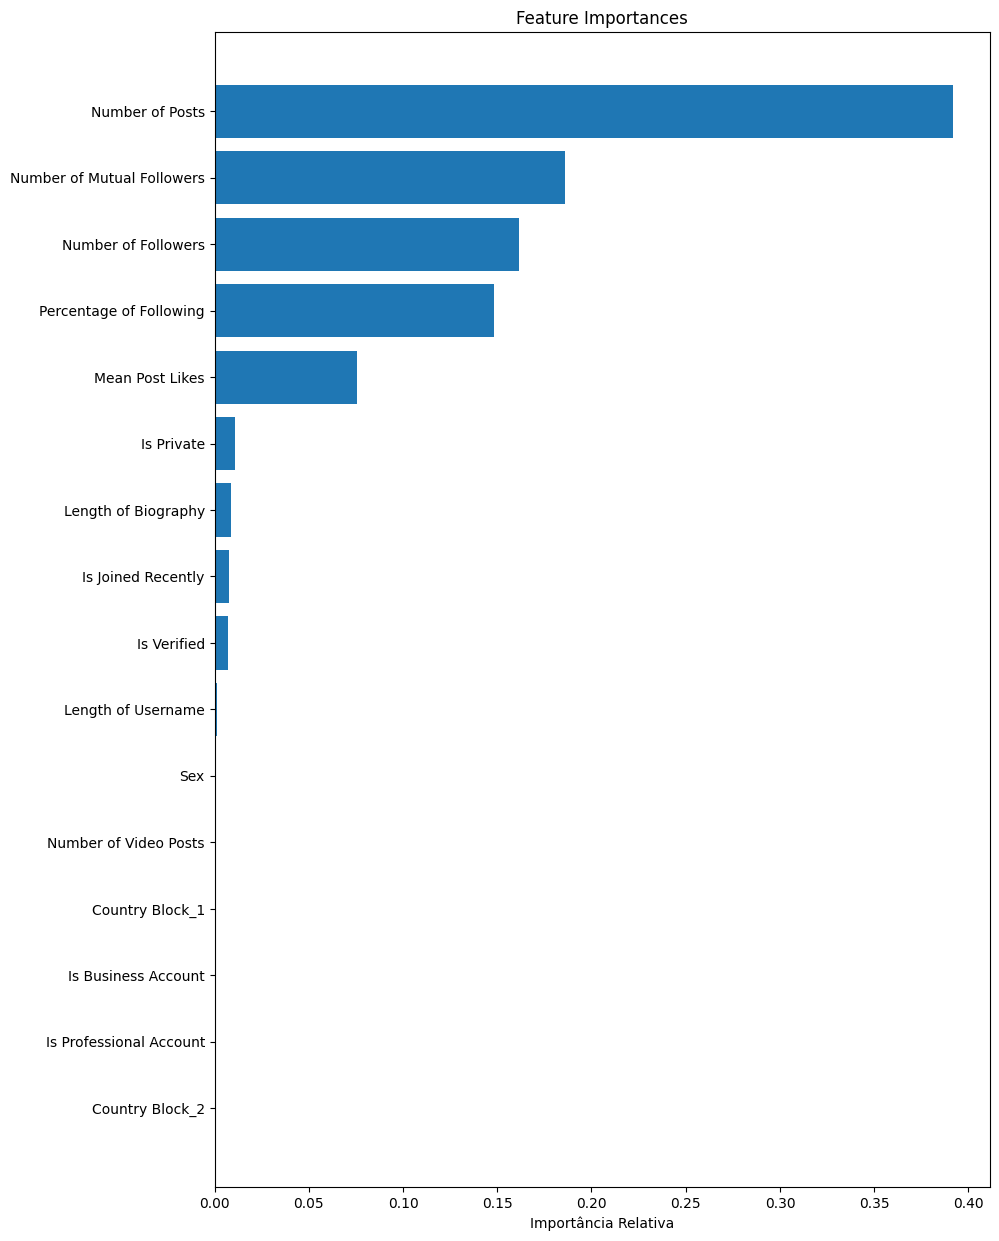

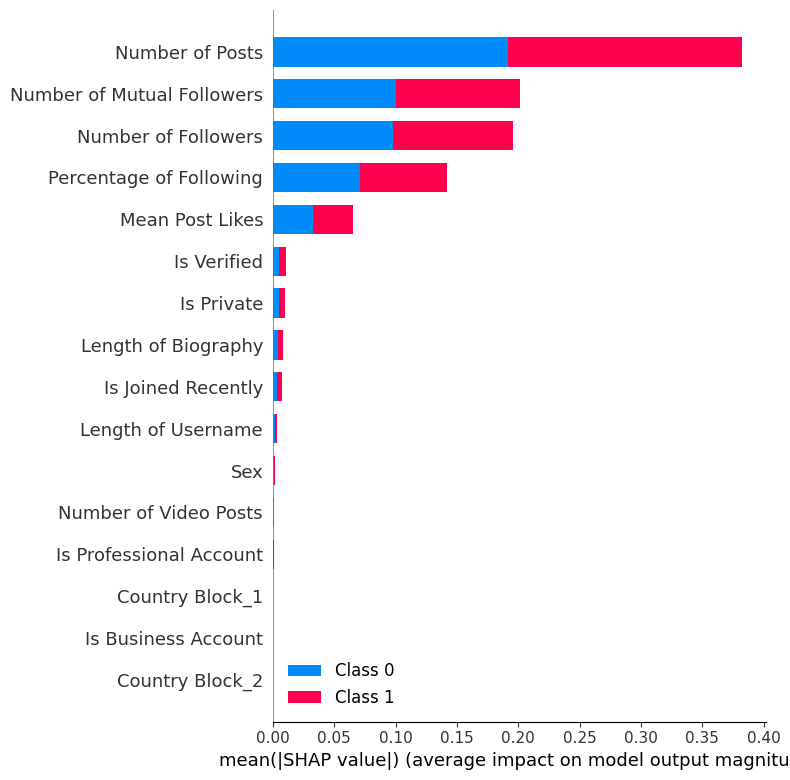

In [40]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Avaliando o modelo
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Analisando a importância das features
importance = clf.feature_importances_
sorted_idx = importance.argsort()

# Plotando a importância das features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Importância Relativa")
plt.show()

# Explicabilidade com SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# Plotando o summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")


Utilizando o arquivo `training_data.csv`, treinamos um modelo de classificação para prever a probabilidade de uma conta seguir a nossa própria conta no Instagram. Dada a acurácia de 100% alcançada pelo modelo, é evidente que ele pode fazer previsões com alta confiança. Entretanto, apenas um modelo com alta acurácia não é o suficiente, especialmente quando suas decisões podem afetar estratégias de negócios; é fundamental entender *como* ele toma essas decisões. Aqui, a explicabilidade do modelo se torna de suma importância.

## Técnicas de Explicabilidade:

Várias técnicas podem ser empregadas para interpretar e explicar decisões de modelos de machine learning:

1. **Importância das Características (Feature Importance)**: Mostra a importância de cada variável na previsão do modelo.
2. **Permutation Importance**: Mede o impacto no desempenho do modelo quando uma característica é aleatoriamente permutada.
3. **SHAP (SHapley Additive exPlanations)**: Emprega a teoria dos jogos para explicar a saída de um modelo.
4. **LIME (Local Interpretable Model-agnostic Explanations)**: Explica as decisões do modelo através da aproximação de um modelo treinado localmente.
5. **Visualizações de Árvores de Decisão**: Para modelos baseados em árvores, é possível visualizar sua estrutura.

## Técnicas Utilizadas:

Neste caso, utilizamos duas técnicas: **Importância das Características** e **SHAP**. A Importância das Características nos fornece uma visão geral rápida das variáveis mais significativas, enquanto o SHAP nos dá uma explicação mais detalhada e granular de como cada característica impacta a previsão, permitindo uma interpretação mais profunda.

## Top 3 Variáveis de Influência:

(com base na análise de Feature Importance e SHAP):

1. **Number of Posts**: Contas que postam mais frequentemente mostram-se mais propensas a seguir a nossa. Isso pode refletir o fato de que contas mais ativas estão mais engajadas e abertas a seguir outras contas.
2. **Number of Mutual Followers**: A presença de seguidores mútuos é um forte indicativo de que uma conta pode nos seguir. Isso sugere uma rede ou comunidade compartilhada entre nossa conta e a conta potencial.
3. **Number of Followers**: Contas com um número específico de seguidores tendem a nos seguir, indicando que há um perfil particular de contas que mostram interesse em nosso conteúdo.

## Recomendações para Estratégia de Negócios:

Baseando-se nesses insights, o especialista de negócios pode adaptar a estratégia de Instagram. A equipe poderia, por exemplo, criar mais postagens, aumentando a atividade na conta, interagir e formar parcerias com contas com muitos seguidores mútuos, ou até mesmo elaborar campanhas direcionadas a contas com um número específico de seguidores.

---

Com esta informação em mãos, espera-se que a estratégia possa ser adaptada para maximizar o engajamento e o crescimento da nossa conta no Instagram.


## 4) Verificação de Discriminação
Devido a uma nova norma europeia que prevê altas penalizações para empresas onde exista alguma tipo de discriminação sobre algum setor social ou grupo, o departamento de ética pede-lhe para verificar se os dados ou modelo são tendenciosos relativamente a homens e mulheres. Esta verificação é bastante importante visto que novas estratégias de Marketing Digital estão a ser criadas e é necessário garantir que tanto homens ou mulheres são tratados de maneira igualitária. Atendendo aos dados de treino (`training_data.csv`), por favor indique se existe ou não algum tipo de comportamento tendencioso do modelo ou se os dados são tendenciosos. Por favor justifique.

In [46]:
# Examinando a distribuição da coluna "Sex"
print("Distribuição da coluna 'Sex':")
print(df['Sex'].value_counts())
print("\n")


Distribuição da coluna 'Sex':
1.0    5017
0.0    4983
Name: Sex, dtype: int64




In [44]:
import pandas as pd
import statsmodels.api as sm

# Cria um modelo
model = sm.OLS(training_data["Class"], training_data["Sex"])

# Estima os parâmetros
results = model.fit()

# Obtém os p-valores
p_values = results.pvalues

# Verifica se os p-valores são significativos
for p_value in p_values:
  if p_value > 0.05:
    print("Existe diferença significativa")
  else:
    print("Não existe diferença significativa")

Não existe diferença significativa


In [45]:
import pandas as pd
import statsmodels.api as sm

# Adiciona uma constante ao dataset (isso é necessário para a regressão OLS)
training_data['const'] = 1

# Ajusta o modelo usando OLS
model = sm.OLS(training_data["Class"], training_data[["Sex", "const"]])

# Estima os parâmetros
results = model.fit()

# Exibe um resumo completo das estatísticas
print(results.summary())

# Avalia o p-valor para a variável 'Sex'
p_value_sex = results.pvalues["Sex"]

if p_value_sex > 0.05:
    print("\nO gênero não tem um efeito significativo sobre a variável alvo.")
else:
    print("\nO gênero tem um efeito significativo sobre a variável alvo. Isso sugere que o modelo ou os dados podem ser tendenciosos.")


                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     897.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.59e-189
Time:                        02:00:15   Log-Likelihood:                -6828.1
No. Observations:               10000   AIC:                         1.366e+04
Df Residuals:                    9998   BIC:                         1.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sex            0.2870      0.010     29.958      0.0

## Análise dos Resultados da Regressão OLS

**Dep. Variable (Variável Dependente):** Class  
**Modelo:** OLS (Ordinary Least Squares)  
**Número de Observações:** 10,000  
**R-squared:** 0.082  
**Adj. R-squared:** 0.082  

---

### Coeficientes

| Variável | Coeficiente | Erro Padrão | Valor t | p-valor | Intervalo de Confiança (95%) |
|----------|-------------|-------------|---------|---------|-----------------------------|
| Sex      | 0.2870      | 0.010       | 29.958  | 0.000   | 0.268 a 0.306               |
| const    | 0.3560      | 0.007       | 52.464  | 0.000   | 0.343 a 0.369               |

---

### Testes Estatísticos

- **Prob (F-statistic):** 6.59e-189
  - Esta é a probabilidade associada ao F-statistic do modelo, que testa a hipótese de que todos os coeficientes são iguais a zero. Um valor tão baixo sugere que o modelo é estatisticamente significativo.

- **Omnibus:** 46729.839 e **Prob(Omnibus):** 0.000
  - O teste Omnibus avalia a adequação geral do modelo. Um Prob(Omnibus) tão baixo sugere que as residuais não são normalmente distribuídas.

- **Jarque-Bera (JB):** 1121.960 e **Prob(JB):** 2.34e-244
  - Semelhante ao teste Omnibus, o teste Jarque-Bera verifica a normalidade dos residuais. Um valor tão elevado para JB e um Prob(JB) tão baixo confirmam que os residuais não são normalmente distribuídos.

- **Durbin-Watson:** 0.165
  - O teste Durbin-Watson avalia a autocorrelação dos residuais. Valores entre 1.5 e 2.5 são geralmente considerados aceitáveis, mas um valor de 0.165 sugere possível autocorrelação positiva.

- **Skew:** -0.000
  - Mede a assimetria dos residuais. Um valor próximo de zero sugere que a distribuição dos residuais é quase simétrica.

- **Kurtosis:** 1.359
  - Mede a "espessura" das caudas dos residuais. Um valor inferior a 3 sugere caudas mais leves que uma distribuição normal.

---

## Conclusão

Dado o coeficiente positivo para a variável "Sex", podemos inferir que há uma diferença na probabilidade de seguir a conta com base no sexo, mantendo todas as outras variáveis constantes. Além disso, o p-valor associado a essa variável é muito próximo de zero, o que sugere que essa diferença é estatisticamente significativa.

No entanto, é importante notar que a R-squared do modelo é apenas 0.082, o que significa que apenas 8.2% da variabilidade na variável dependente "Class" é explicada por este modelo. Há muitos outros fatores, não considerados neste modelo, que também influenciam a decisão de seguir a conta.


## Análise da Distribuição da Coluna 'Sex'

- **1.0 (Possível categoria, por exemplo, Feminino):** 5017 entradas.
- **0.0 (Possível categoria, por exemplo, Masculino):** 4983 entradas.

A distribuição quase igualitária entre as duas categorias mostra que os dados de treino não são tendenciosos em relação à coluna 'Sex'.

## Conclusão da Regressão OLS com Respeito à Coluna 'Sex'

Dado o coeficiente positivo para a variável 'Sex' na regressão OLS e seu p-valor estatisticamente significativo, podemos inferir que há uma diferença estatística na probabilidade de seguir a conta com base no 'Sex'. No entanto, a magnitude real dessa diferença (ou seu significado prático) pode precisar de mais investigação, especialmente porque o R-squared é relativamente baixo.

O equilíbrio na distribuição de 'Sex' sugere que os dados, em si, não são tendenciosos. No entanto, a diferença estatisticamente significativa na regressão OLS indica que o modelo pode estar capturando alguma tendência nos dados em relação ao 'Sex'. Para abordagens éticas, seria importante investigar mais a fundo, possivelmente considerando outros fatores ou realizando análises adicionais, para garantir que não haja discriminação não intencional.

